# Deep Learning con TensorFlow y Keras

Este notebook cubre el uso de TensorFlow y Keras para construir y entrenar redes neuronales profundas.

## Introducción

TensorFlow es una biblioteca de código abierto para machine learning desarrollada por Google. Keras es una API de alto nivel que simplifica el uso de TensorFlow.

> **Nota**: TensorFlow es una dependencia opcional. Si no está instalado, el notebook mostrará mensajes informativos. Para instalar TensorFlow, ejecuta: `pip install tensorflow`


## Importar Librerías


In [7]:
# Suprimir mensajes informativos de TensorFlow
# IMPORTANTE: Estas variables deben establecerse ANTES de importar TensorFlow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suprime INFO (1) y WARNING (2), muestra solo ERROR (3)
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

try:
    import tensorflow as tf
    # Configurar logging de TensorFlow para suprimir mensajes adicionales
    tf.get_logger().setLevel('ERROR')
    
    from tensorflow import keras
    from tensorflow.keras import layers, models
    from tensorflow.keras.datasets import mnist, cifar10
    from tensorflow.keras.utils import to_categorical
    
    TENSORFLOW_AVAILABLE = True
    print(f"✓ TensorFlow versión: {tf.__version__}")
    print("TensorFlow está disponible. Puedes ejecutar todos los ejemplos.")
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("⚠ TensorFlow no está instalado.")
    print("   Para instalar TensorFlow, ejecuta: pip install tensorflow")
    print("   El notebook mostrará ejemplos de código pero no los ejecutará.")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
if TENSORFLOW_AVAILABLE:
    tf.random.set_seed(42)


✓ TensorFlow versión: 2.20.0
TensorFlow está disponible. Puedes ejecutar todos los ejemplos.


## 1. Construcción de Modelos con Keras

Keras ofrece dos formas principales de construir modelos:
- **Sequential API**: Para modelos lineales simples
- **Functional API**: Para modelos más complejos con múltiples entradas/salidas


In [8]:
if TENSORFLOW_AVAILABLE:
    # Ejemplo 1: Sequential API
    model_sequential = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,)),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    
    print("Modelo Sequential:")
    model_sequential.summary()
    
    # Ejemplo 2: Functional API
    inputs = keras.Input(shape=(784,))
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    model_functional = keras.Model(inputs=inputs, outputs=outputs)
    
    print("\nModelo Functional API:")
    model_functional.summary()
else:
    print("TensorFlow no disponible. Ejecuta: pip install tensorflow")


Modelo Sequential:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


Modelo Functional API:


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 2. Ejemplo: Clasificación de Dígitos (MNIST)

Entrenaremos una red neuronal para clasificar dígitos escritos a mano.


Entrenando modelo...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9161 - loss: 0.2784 - val_accuracy: 0.9688 - val_loss: 0.0995
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9653 - loss: 0.1134 - val_accuracy: 0.9755 - val_loss: 0.0813
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9756 - loss: 0.0788 - val_accuracy: 0.9790 - val_loss: 0.0724
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9804 - loss: 0.0612 - val_accuracy: 0.9802 - val_loss: 0.0660
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0476 - val_accuracy: 0.9790 - val_loss: 0.0692

Precisión en test: 0.9779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


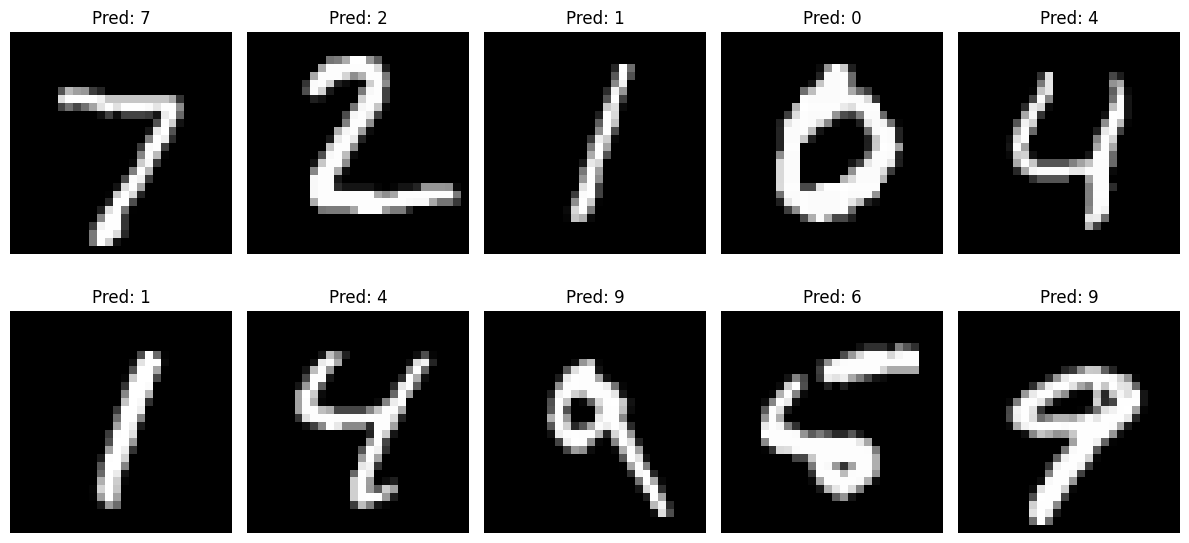

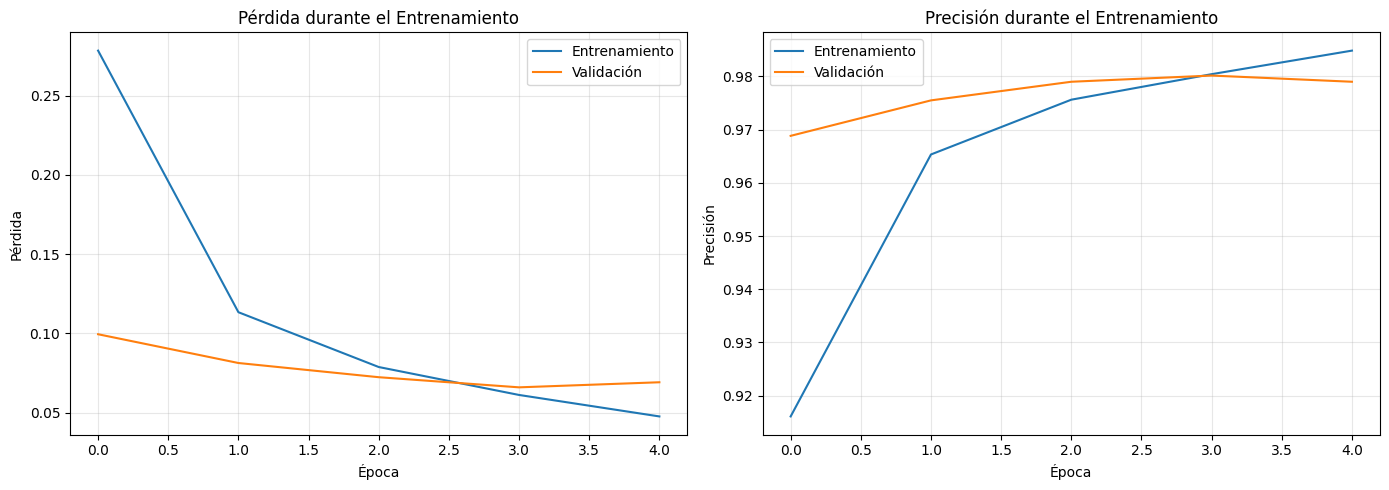

In [9]:
if TENSORFLOW_AVAILABLE:
    # Cargar datos MNIST
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    
    # Preprocesamiento
    x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
    x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
    
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    
    # Crear modelo
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,)),
        layers.Dropout(0.2),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    
    # Compilar modelo
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # Entrenar modelo (solo unas pocas épocas para demostración)
    print("Entrenando modelo...")
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=5,
        validation_split=0.1,
        verbose=1
    )
    
    # Evaluar
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"\nPrecisión en test: {test_acc:.4f}")
    
    # Visualizar algunas predicciones
    predictions = model.predict(x_test[:10])
    predicted_classes = np.argmax(predictions, axis=1)
    
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i in range(10):
        row, col = i // 5, i % 5
        axes[row, col].imshow(x_test[i].reshape(28, 28), cmap='gray')
        axes[row, col].set_title(f'Pred: {predicted_classes[i]}')
        axes[row, col].axis('off')
    plt.tight_layout()
    plt.show()
    
    # Curva de aprendizaje
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].plot(history.history['loss'], label='Entrenamiento')
    axes[0].plot(history.history['val_loss'], label='Validación')
    axes[0].set_xlabel('Época')
    axes[0].set_ylabel('Pérdida')
    axes[0].set_title('Pérdida durante el Entrenamiento')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(history.history['accuracy'], label='Entrenamiento')
    axes[1].plot(history.history['val_accuracy'], label='Validación')
    axes[1].set_xlabel('Época')
    axes[1].set_ylabel('Precisión')
    axes[1].set_title('Precisión durante el Entrenamiento')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("TensorFlow no disponible. Instala con: pip install tensorflow")


In [10]:
if TENSORFLOW_AVAILABLE:
    print("Tipos de capas comunes en Keras:")
    print("\n1. Dense (Totalmente Conectada):")
    print("   - layers.Dense(units, activation='relu')")
    print("   - Para capas completamente conectadas")
    
    print("\n2. Conv2D (Convolucional 2D):")
    print("   - layers.Conv2D(filters, kernel_size, activation='relu')")
    print("   - Para procesamiento de imágenes")
    
    print("\n3. LSTM (Long Short-Term Memory):")
    print("   - layers.LSTM(units, return_sequences=True)")
    print("   - Para secuencias y series temporales")
    
    print("\n4. Dropout (Regularización):")
    print("   - layers.Dropout(rate=0.2)")
    print("   - Previene sobreajuste")
    
    print("\n5. BatchNormalization:")
    print("   - layers.BatchNormalization()")
    print("   - Normaliza las activaciones")
    
    print("\n6. MaxPooling2D:")
    print("   - layers.MaxPooling2D(pool_size=(2, 2))")
    print("   - Reduce dimensionalidad")
    
    # Ejemplo de modelo CNN
    print("\n\nEjemplo de modelo CNN:")
    cnn_model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    cnn_model.summary()
else:
    print("TensorFlow no disponible")


Tipos de capas comunes en Keras:

1. Dense (Totalmente Conectada):
   - layers.Dense(units, activation='relu')
   - Para capas completamente conectadas

2. Conv2D (Convolucional 2D):
   - layers.Conv2D(filters, kernel_size, activation='relu')
   - Para procesamiento de imágenes

3. LSTM (Long Short-Term Memory):
   - layers.LSTM(units, return_sequences=True)
   - Para secuencias y series temporales

4. Dropout (Regularización):
   - layers.Dropout(rate=0.2)
   - Previene sobreajuste

5. BatchNormalization:
   - layers.BatchNormalization()
   - Normaliza las activaciones

6. MaxPooling2D:
   - layers.MaxPooling2D(pool_size=(2, 2))
   - Reduce dimensionalidad


Ejemplo de modelo CNN:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Resumen

### Conceptos Clave

- **TensorFlow**: Framework de deep learning de bajo nivel
- **Keras**: API de alto nivel para TensorFlow
- **Sequential API**: Para modelos lineales simples
- **Functional API**: Para modelos complejos
- **Callbacks**: Para monitorear y controlar el entrenamiento

### Aplicaciones

- Visión por computadora (CNN)
- Procesamiento de lenguaje natural (RNN, LSTM)
- Reconocimiento de voz
- Sistemas de recomendación
- Análisis de series temporales
